In [ ]:
# import pandas as pd

# splits = {'train': 'data/train-00000-of-00001-aeb35d2d506d38bf.parquet', 'test': 'data/test-00000-of-00001-0dca1a897ce597dd.parquet'}
# df = pd.read_parquet("hf://datasets/m-aliabbas/idrak_timit_subsample1/" + splits["train"])

In [1]:
import datasets

In [2]:
dataset = datasets.load_dataset("m-aliabbas/idrak_timit_subsample1", split="train")

In [3]:
data = next(iter(dataset))
audio = data["audio"]["array"]
sample_rate = data["audio"]["sampling_rate"]
transciption = data["transcription"]

In [4]:
data

{'audio': {'path': None,
  'array': array([3.05175781e-05, 0.00000000e+00, 3.05175781e-05, ...,
         0.00000000e+00, 3.05175781e-05, 1.22070312e-04]),
  'sampling_rate': 16000},
 'transcription': 'don t ask me to carry an oily rag like that'}

In [5]:
print(f"Audio shape: {audio.shape}")
print(f"Sample rate: {sample_rate}")

Audio shape: (35840,)
Sample rate: 16000


In [6]:
from IPython.display import Audio
Audio(audio, rate=sample_rate)

Text(0.5, 1.0, 'Waveform')

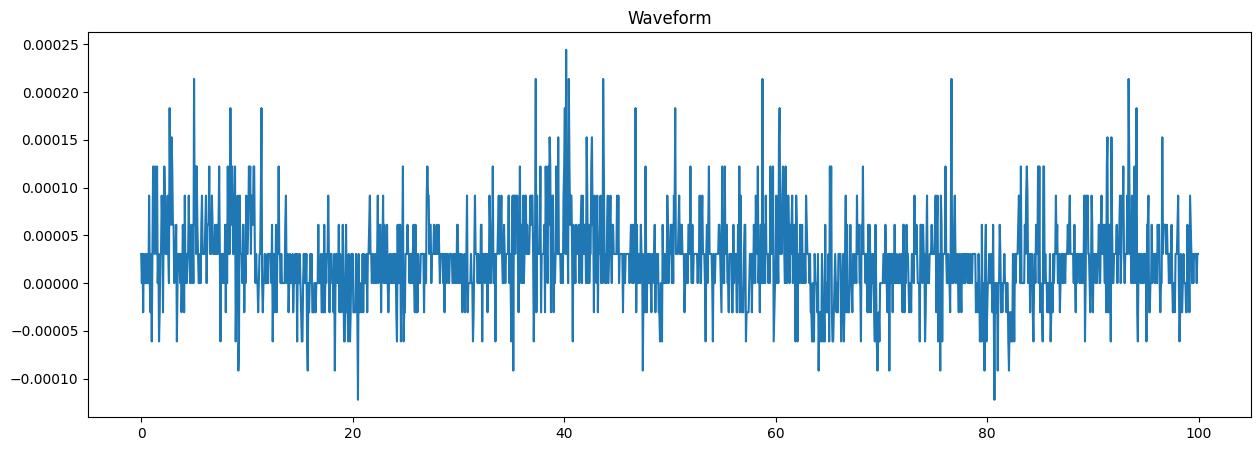

In [7]:
import numpy as np
import matplotlib.pyplot as plt

start_time_ms = 0
end_time_ms = 100

start_idx = int(start_time_ms * sample_rate / 1000)
end_idx = int(end_time_ms * sample_rate / 1000)

audio_np = audio[start_idx:end_idx]

time_ms =np.arange(len(audio_np)) * (1000 / sample_rate)
plt.figure(figsize=(15, 5))
plt.plot(time_ms, audio_np)
plt.title("Waveform")

In [8]:
from tokenizers import Tokenizer, models, pre_tokenizers, decoders

In [18]:
def get_tokenizer(save_path="tokenizer.json"):
    tokenizer = Tokenizer(models.BPE())
    tokenizer.add_special_tokens(["<unk>", "<pad>", "<s>", "</s>",])
    tokenizer.add_tokens(list("ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz' "))
    tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()
    tokenizer.decoder = decoders.ByteLevel()
    tokenizer.blank_token =tokenizer.token_to_id("<unk>")
    tokenizer.save(save_path)
    return tokenizer

In [19]:
tokenizer = get_tokenizer()
tokenizer.get_vocab()

{'d': 33,
 'M': 16,
 'F': 9,
 ' ': 57,
 'J': 13,
 'Z': 29,
 'G': 10,
 'f': 35,
 't': 49,
 'v': 51,
 'g': 36,
 'y': 54,
 'u': 50,
 'm': 42,
 'o': 44,
 "'": 56,
 'p': 45,
 'L': 15,
 '<pad>': 1,
 'B': 5,
 'N': 17,
 'w': 52,
 'A': 4,
 '<s>': 2,
 'l': 41,
 'I': 12,
 'a': 30,
 'W': 26,
 'P': 19,
 'j': 39,
 'R': 21,
 'z': 55,
 'O': 18,
 'T': 23,
 'C': 6,
 'x': 53,
 'U': 24,
 'c': 32,
 'r': 47,
 'n': 43,
 'V': 25,
 'S': 22,
 'K': 14,
 '</s>': 3,
 'Y': 28,
 'q': 46,
 '<unk>': 0,
 'Q': 20,
 's': 48,
 'H': 11,
 'h': 37,
 'e': 34,
 'b': 31,
 'k': 40,
 'D': 7,
 'i': 38,
 'E': 8,
 'X': 27}

In [24]:
transcipt = "Move it to ya'll"
transcipt = transcipt.upper()
input_ids = tokenizer.encode(transcipt)

In [25]:
print(input_ids.tokens)
print(input_ids.ids)

['M', 'O', 'V', 'E', ' ', 'I', 'T', ' ', 'T', 'O', ' ', 'Y', 'A', "'", 'L', 'L']
[16, 18, 25, 8, 57, 12, 23, 57, 23, 18, 57, 28, 4, 56, 15, 15]
